In [415]:
pip install yfinance

In [416]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [417]:


# Define stock symbols & time period
tickers = ['AAPL', 'GOOGL', 'MSFT']
start_date = "2023-01-01"
end_date = "2024-03-25"

df_list = []  # Store individual DataFrames

# Fetch data
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    stock_data = stock_data.assign(Ticker=ticker)  # Add Ticker column properly
    stock_data.reset_index(inplace=True)  # Reset Date index

    # ✅ Flatten MultiIndex column names correctly

    stock_data.columns = [col[0] for col in stock_data.columns]  # Keep only the first level

    df_list.append(stock_data)

# Merge all stock data
df = pd.concat(df_list, ignore_index=True)

# ✅ Convert to long format (Fixed)
df_long = df.melt(id_vars=["Date", "Ticker"], var_name="Price Type", value_name="Value")

# Display result
df_long


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,Ticker,Price Type,Value
0,2023-01-03,AAPL,Close,1.236325e+02
1,2023-01-04,AAPL,Close,1.249077e+02
2,2023-01-05,AAPL,Close,1.235831e+02
3,2023-01-06,AAPL,Close,1.281302e+02
4,2023-01-09,AAPL,Close,1.286541e+02
...,...,...,...,...
4600,2024-03-18,MSFT,Volume,2.010600e+07
4601,2024-03-19,MSFT,Volume,1.983790e+07
4602,2024-03-20,MSFT,Volume,1.786010e+07
4603,2024-03-21,MSFT,Volume,2.129620e+07


In [418]:

# Melt into long format (Convert column names to rows)
# df_long = df.melt(id_vars=["Date", "Ticker"], var_name="Price Type", value_name="Value")

In [419]:
df_long.columns


Index(['Date', 'Ticker', 'Price Type', 'Value'], dtype='object')

In [420]:
df_long["Ticker"].unique()

array(['AAPL', 'GOOGL', 'MSFT'], dtype=object)

In [421]:
df_long.groupby(["Date", "Ticker"])["Price Type"].nunique()


Date        Ticker
2023-01-03  AAPL      5
            GOOGL     5
            MSFT      5
2023-01-04  AAPL      5
            GOOGL     5
                     ..
2024-03-21  GOOGL     5
            MSFT      5
2024-03-22  AAPL      5
            GOOGL     5
            MSFT      5
Name: Price Type, Length: 921, dtype: int64

In [422]:
df_long.columns


Index(['Date', 'Ticker', 'Price Type', 'Value'], dtype='object')

In [423]:
df_wide = df_long.pivot(index=['Date', 'Ticker'], columns='Price Type', values='Value').reset_index()



In [424]:
df_wide['Open-Close Difference'] = df_wide['Open'] - df_wide['Close']
df_wide

Price Type,Date,Ticker,Close,High,Low,Open,Volume,Open-Close Difference
0,2023-01-03,AAPL,123.632523,129.395510,122.742865,128.782641,112117500.0,5.150119
1,2023-01-03,GOOGL,88.695946,90.616763,88.098795,89.163703,28131200.0,0.467757
2,2023-01-03,MSFT,235.240036,241.298265,233.099519,238.676634,25740000.0,3.436598
3,2023-01-04,AAPL,124.907700,127.181268,123.642412,125.431607,89113600.0,0.523907
4,2023-01-04,GOOGL,87.660904,90.218675,86.854753,89.920100,34854800.0,2.259196
...,...,...,...,...,...,...,...,...
916,2024-03-21,GOOGL,146.897675,149.654483,146.200993,148.758772,24755600.0,1.861097
917,2024-03-21,MSFT,426.116760,427.555786,423.923513,426.573266,21296200.0,0.456506
918,2024-03-22,AAPL,171.470352,172.236738,169.260784,170.952792,71106600.0,-0.517560
919,2024-03-22,GOOGL,150.052612,150.858756,148.271121,148.410454,29175700.0,-1.642158


In [425]:
df_long = df_wide.melt(
    id_vars=['Date', 'Ticker'],
    value_vars=['Open', 'Close', 'High', 'Low', 'Volume', 'Open-Close Difference'],
    var_name='Price Type',
    value_name='Value'
)

In [426]:
df_long['Price Difference'] = df_long.groupby(['Ticker', 'Price Type'])['Value'].diff()

In [427]:
# df_long['Date'] = pd.to_datetime(df_long['Date'])  # Ensure it's datetime
# df_long.set_index('Date', inplace=True)

In [428]:
# df_long.where(df['Price Type'] == 'Volume')
df_long.sort_values(by='Ticker')

,Date,Ticker,Price Type,Value,Price Difference
0,2023-01-03,AAPL,Open,128.782641,NaN
2223,2023-07-07,AAPL,High,191.010216,0.644395
4782,2023-03-29,AAPL,Open-Close Difference,-1.386032,-1.702844
2226,2023-07-10,AAPL,High,188.353316,-2.656900
2229,2023-07-11,AAPL,High,187.669254,-0.684062
...,...,...,...,...,...
2771,2023-01-05,MSFT,Low,217.742828,-4.123929
2774,2023-01-06,MSFT,Low,215.376502,-2.366326
2777,2023-01-09,MSFT,Low,222.308592,6.932090
2750,2024-03-18,MSFT,High,417.542217,-1.855844


In [429]:
#Calculating Fields
window =20
df_long.reset_index(inplace=True)


df_close = df_long[df_long['Price Type'] == 'Close'].copy()

#Calculating SMA i.e. Simple Moving Average
df_close['SMA'] = df_close['Value'].rolling(window=window).mean()

#Calculating Bollinger Bands
df_close['Rolling Std'] = df_close['Value'].rolling(window=window).std()
df_close['Upper Band'] = df_close['SMA'] + (2*df_close['Rolling Std'])
df_close['Lower Band'] = df_close['SMA'] - (2*df_close['Rolling Std'])

#Calculating EMA i.e. Exponential Moving Average
df_close['EMA_12'] = df_close['Value'].ewm(span=12, adjust = False).mean()
df_close['EMA_26'] = df_close['Value'].ewm(span=26, adjust = False).mean()

df_long = df_long.merge(
    df_close[['Date', 'Ticker', 'SMA', 'Rolling Std', 'Upper Band', 'Lower Band', 'EMA_12', 'EMA_26']],
    on=["Date", "Ticker"],
    how="left"
)





In [430]:
df_long[df_long['Price Type'] == 'High']

,index,Date,Ticker,Price Type,Value,Price Difference,SMA,Rolling Std,Upper Band,Lower Band,EMA_12,EMA_26
1842,1842,2023-01-03,AAPL,High,129.395510,NaN,NaN,NaN,NaN,NaN,123.632523,123.632523
1843,1843,2023-01-03,GOOGL,High,90.616763,NaN,NaN,NaN,NaN,NaN,118.257665,121.044628
1844,1844,2023-01-03,MSFT,High,241.298265,NaN,NaN,NaN,NaN,NaN,136.254953,129.503547
1845,1845,2023-01-04,AAPL,High,127.181268,-2.214243,NaN,NaN,NaN,NaN,134.509221,129.163114
1846,1846,2023-01-04,GOOGL,High,90.218675,-0.398087,NaN,NaN,NaN,NaN,127.301788,126.088876
...,...,...,...,...,...,...,...,...,...,...,...,...
2758,2758,2024-03-21,GOOGL,High,149.654483,1.502787,236.138175,122.101561,480.341298,-8.064947,231.118493,236.985239
2759,2759,2024-03-21,MSFT,High,427.555786,4.823219,248.927725,128.094573,505.116870,-7.261420,261.118227,250.994981
2760,2760,2024-03-22,AAPL,High,172.236738,-4.419116,250.545000,126.833258,504.211517,-3.121516,247.326246,245.104268
2761,2761,2024-03-22,GOOGL,High,150.858756,1.204273,237.449886,122.745513,482.940912,-8.041139,232.361072,238.063405


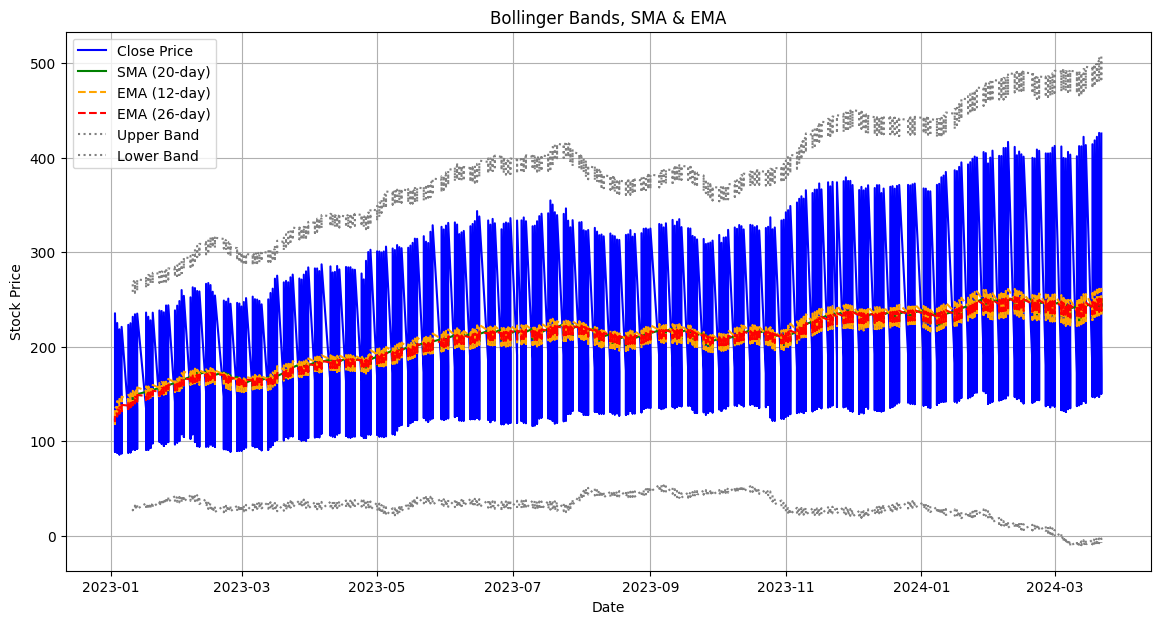

In [431]:

plt.figure(figsize=(14, 7))

# Plot Close Price
plt.plot(df_close['Date'], df_close['Value'], label='Close Price', color='blue')

# Plot Moving Averages
plt.plot(df_close['Date'], df_close['SMA'], label='SMA (20-day)', color='green')
plt.plot(df_close['Date'], df_close['EMA_12'], label='EMA (12-day)', color='orange', linestyle='dashed')
plt.plot(df_close['Date'], df_close['EMA_26'], label='EMA (26-day)', color='red', linestyle='dashed')

# Plot Bollinger Bands
plt.plot(df_close['Date'], df_close['Upper Band'], label='Upper Band', color='gray', linestyle='dotted')
plt.plot(df_close['Date'], df_close['Lower Band'], label='Lower Band', color='gray', linestyle='dotted')

plt.title('Bollinger Bands, SMA & EMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()

plt.show()

In [432]:
df_long.dtypes

,0
index,int64
Date,datetime64[ns]
Ticker,object
Price Type,object
Value,float64
Price Difference,float64
SMA,float64
Rolling Std,float64
Upper Band,float64
Lower Band,float64


In [433]:
df_long.duplicated().sum()

np.int64(0)

In [434]:
df_long.tail()
df_long.columns

Index(['index', 'Date', 'Ticker', 'Price Type', 'Value', 'Price Difference',
       'SMA', 'Rolling Std', 'Upper Band', 'Lower Band', 'EMA_12', 'EMA_26'],
      dtype='object')

In [435]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5526 entries, 0 to 5525
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             5526 non-null   int64         
 1   Date              5526 non-null   datetime64[ns]
 2   Ticker            5526 non-null   object        
 3   Price Type        5526 non-null   object        
 4   Value             5526 non-null   float64       
 5   Price Difference  5508 non-null   float64       
 6   SMA               5412 non-null   float64       
 7   Rolling Std       5412 non-null   float64       
 8   Upper Band        5412 non-null   float64       
 9   Lower Band        5412 non-null   float64       
 10  EMA_12            5526 non-null   float64       
 11  EMA_26            5526 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 518.2+ KB


In [436]:
df_long.columns

Index(['index', 'Date', 'Ticker', 'Price Type', 'Value', 'Price Difference',
       'SMA', 'Rolling Std', 'Upper Band', 'Lower Band', 'EMA_12', 'EMA_26'],
      dtype='object')

In [437]:
df_long.describe()

,index,Date,Value,Price Difference,SMA,Rolling Std,Upper Band,Lower Band,EMA_12,EMA_26
count,5526.000000,5526,5.526000e+03,5.508000e+03,5412.000000,5412.000000,5412.000000,5412.000000,5526.000000,5526.000000
mean,2762.500000,2023-08-13 00:04:41.433224704,6.621013e+06,-8.727076e+03,207.573579,88.964970,385.503520,29.643639,206.584818,205.670046
min,0.000000,2023-01-03 00:00:00,-1.347554e+01,-8.449900e+07,142.644265,57.089433,257.148310,-11.309566,118.257665,121.044628
25%,1381.250000,2023-04-24 00:00:00,1.215588e+02,-1.871048e+00,187.510740,77.641952,341.809938,24.925020,186.874810,185.003126
50%,2762.500000,2023-08-14 00:00:00,1.759359e+02,2.034872e-01,211.770190,85.815898,384.615484,30.114330,212.261138,211.369551
75%,4143.750000,2023-12-01 00:00:00,3.347354e+02,2.300614e+00,227.286192,101.586597,430.789980,37.476248,225.910729,226.741839
max,5525.000000,2024-03-22 00:00:00,1.543573e+08,8.772870e+07,251.968780,128.586447,507.288010,53.675558,262.073452,252.586640
std,1595.363125,NaN,1.693966e+07,5.927218e+06,26.717825,16.950892,59.648242,12.978192,29.045935,28.591609


In [438]:
df_long.isnull().sum()

,0
index,0
Date,0
Ticker,0
Price Type,0
Value,0
Price Difference,18
SMA,114
Rolling Std,114
Upper Band,114
Lower Band,114


In [439]:
#Fixing the null values in the dataframe

df_long['Price Difference'] = df_long['Price Difference'].fillna(0)

df_long = df_long.fillna(method='bfill')

<ipython-input-439-9ade4fcb8157>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_long = df_long.fillna(method='bfill')


<Figure size 1200x600 with 0 Axes>

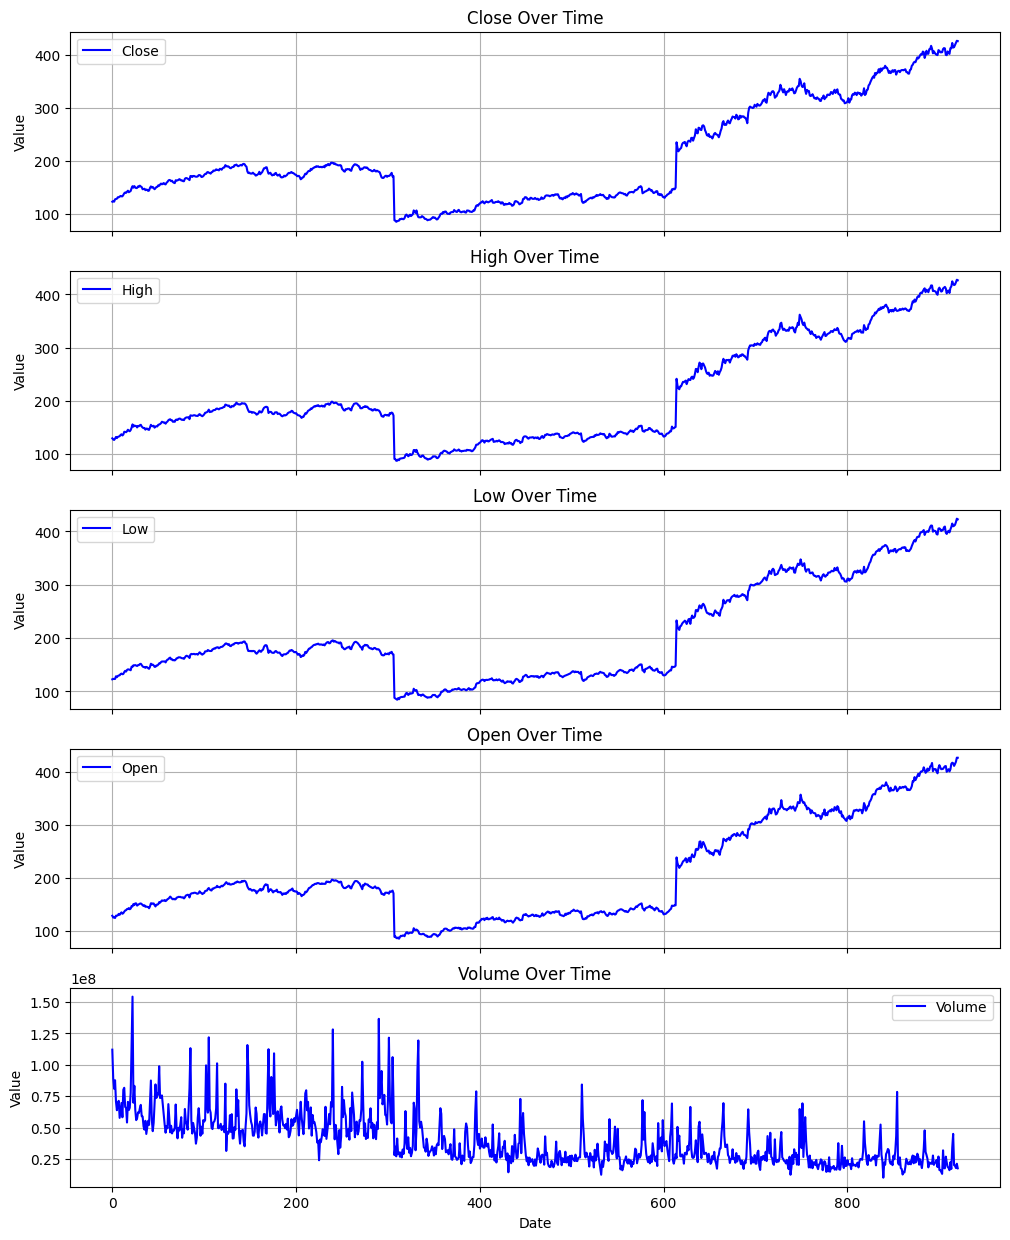

In [440]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(numeric_columns)

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(12, 3 * num_plots), sharex=True)

if num_plots == 1:
    axes = [axes]

for ax, column in zip(axes, numeric_columns):
    ax.plot(df.index, df[column], label=column, color='b')
    ax.set_ylabel("Value")
    ax.set_title(f"{column} Over Time")
    ax.legend()
    ax.grid()

# Common x-axis label
plt.xlabel("Date")

# Adjust layout to prevent overlap
# plt.tight_layout()
plt.show()



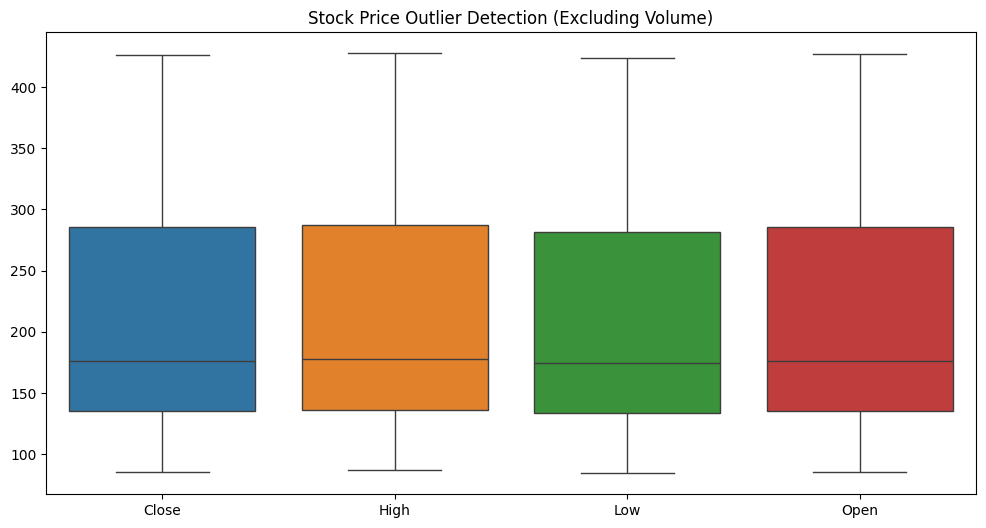

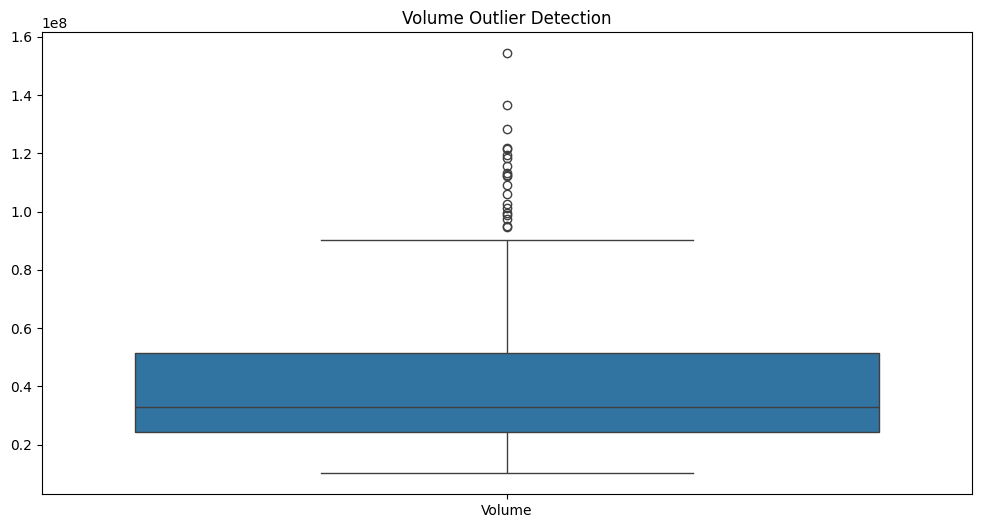

In [441]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate numerical columns except volume
price_columns = [col for col in df.columns[:-1] if 'Volume' not in col]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[price_columns])
plt.title("Stock Price Outlier Detection (Excluding Volume)")
plt.show()

# Plot volume separately
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[[col for col in df.columns if 'Volume' in col]])
plt.title("Volume Outlier Detection")
plt.show()


In [442]:
df_long.columns

Index(['index', 'Date', 'Ticker', 'Price Type', 'Value', 'Price Difference',
       'SMA', 'Rolling Std', 'Upper Band', 'Lower Band', 'EMA_12', 'EMA_26'],
      dtype='object')

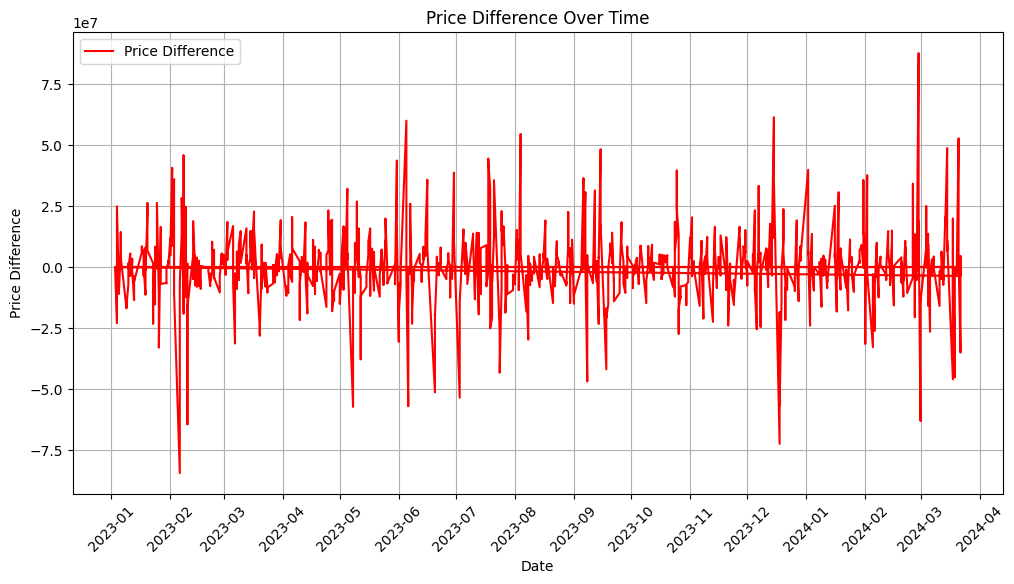

In [443]:
import matplotlib.dates as mdates
df_long['Date'] = pd.to_datetime(df_long['Date'])
df_long.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df_long.index, df_long['Price Difference'], color='r', label='Price Difference')

plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.title('Price Difference Over Time')
plt.legend()
plt.grid()

plt.xticks(rotation=45)  # Rotate for readability
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()

In [444]:
# df_long = df_long.asfreq('D')  # Daily frequency
# df_long['Price Difference'].interpolate(inplace=True)

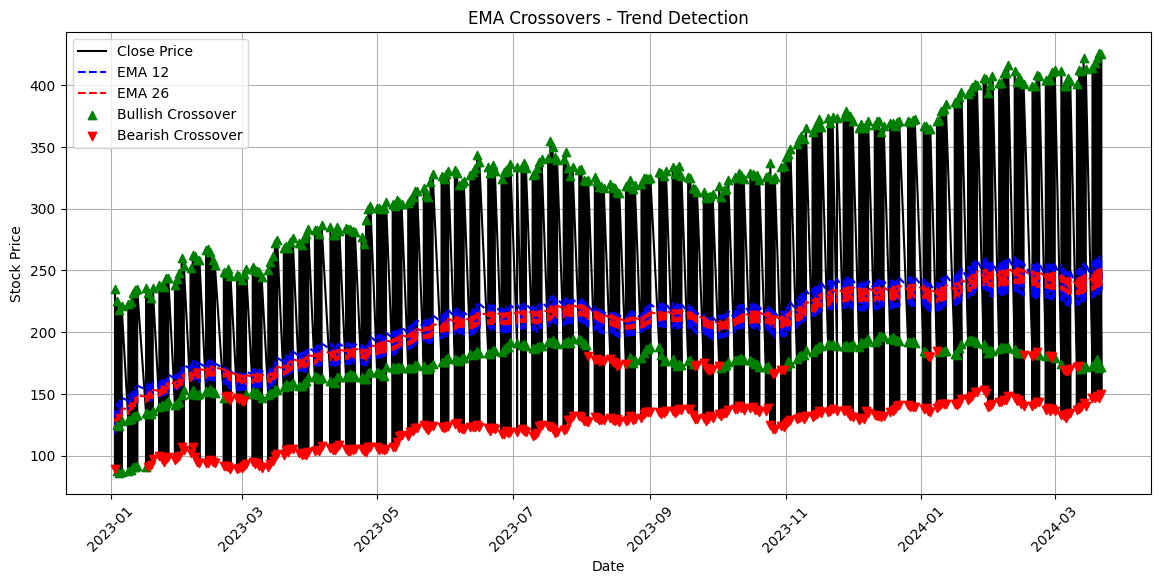

In [445]:

df_long['Signal'] = 0

df_long.loc[(df_long['Price Type'] == 'Close') & (df_long['EMA_12'] > df_long['EMA_26']), 'Signal'] = 1
df_long.loc[(df_long['Price Type'] == 'Close') & (df_long['EMA_12'] < df_long['EMA_26']), 'Signal'] = -1


df_plot = df_long[df_long['Price Type'] == 'Close']

plt.figure(figsize=(14, 6))
plt.plot(df_plot.index, df_plot['Value'], label='Close Price', color='black')
plt.plot(df_plot.index, df_plot['EMA_12'], label='EMA 12', color='blue', linestyle='dashed')
plt.plot(df_plot.index, df_plot['EMA_26'], label='EMA 26', color='red', linestyle='dashed')

# Highlight crossover points
plt.scatter(df_plot[df_plot['Signal'] == 1].index, df_plot[df_plot['Signal'] == 1]['Value'],
            marker='^', color='green', label='Bullish Crossover', alpha=1, zorder=3)
plt.scatter(df_plot[df_plot['Signal'] == -1].index, df_plot[df_plot['Signal'] == -1]['Value'],
            marker='v', color='red', label='Bearish Crossover', alpha=1, zorder=3)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('EMA Crossovers - Trend Detection')
plt.legend()
plt.grid()
plt.xticks(rotation=45)

plt.show()


In [446]:
# Calculate MACD Line
df_long['MACD'] = df_long['EMA_12'] - df_long['EMA_26']

# Calculate Signal Line (9-day EMA of MACD)
df_long['MACD_Signal'] = df_long['MACD'].ewm(span=9, adjust=False).mean()


In [447]:
# List the columns that were merged from df_close (calculated indicators)
import numpy as np
indicator_cols = ['SMA', 'Rolling Std', 'Upper Band', 'Lower Band', 'EMA_12', 'EMA_26']

# Set those indicator values to NaN for rows where Price Type is not "Close"
df_long.loc[df_long['Price Type'] != 'Close', indicator_cols] = np.nan


In [448]:
# print(df_long[df_long['Price Type'] != 'Close'][indicator_cols].head())


In [449]:
df_long[df_long['Price Type']=='Close']

,index,Ticker,Price Type,Value,Price Difference,SMA,Rolling Std,Upper Band,Lower Band,EMA_12,EMA_26,Signal,MACD,MACD_Signal
Date,,,,,,,,,,,,,,
2023-01-03,921,AAPL,Close,123.632523,0.000000,142.644265,57.611736,257.867738,27.420793,123.632523,123.632523,0,0.000000,2.220679
2023-01-03,922,GOOGL,Close,88.695946,0.000000,142.644265,57.611736,257.867738,27.420793,118.257665,121.044628,-1,-2.786963,1.219151
2023-01-03,923,MSFT,Close,235.240036,0.000000,142.644265,57.611736,257.867738,27.420793,136.254953,129.503547,1,6.751405,2.325602
2023-01-04,924,AAPL,Close,124.907700,1.275177,142.644265,57.611736,257.867738,27.420793,134.509221,129.163114,1,5.346107,2.929703
2023-01-04,925,GOOGL,Close,87.660904,-1.035042,142.644265,57.611736,257.867738,27.420793,127.301788,126.088876,1,1.212912,2.586344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,1837,GOOGL,Close,146.897675,-1.134598,236.138175,122.101561,480.341298,-8.064947,231.118493,236.985239,-1,-5.866746,0.834698
2024-03-21,1838,MSFT,Close,426.116760,4.108643,248.927725,128.094573,505.116870,-7.261420,261.118227,250.994981,1,10.123245,2.692407
2024-03-22,1839,AAPL,Close,171.470352,0.905746,250.545000,126.833258,504.211517,-3.121516,247.326246,245.104268,1,2.221978,2.598322


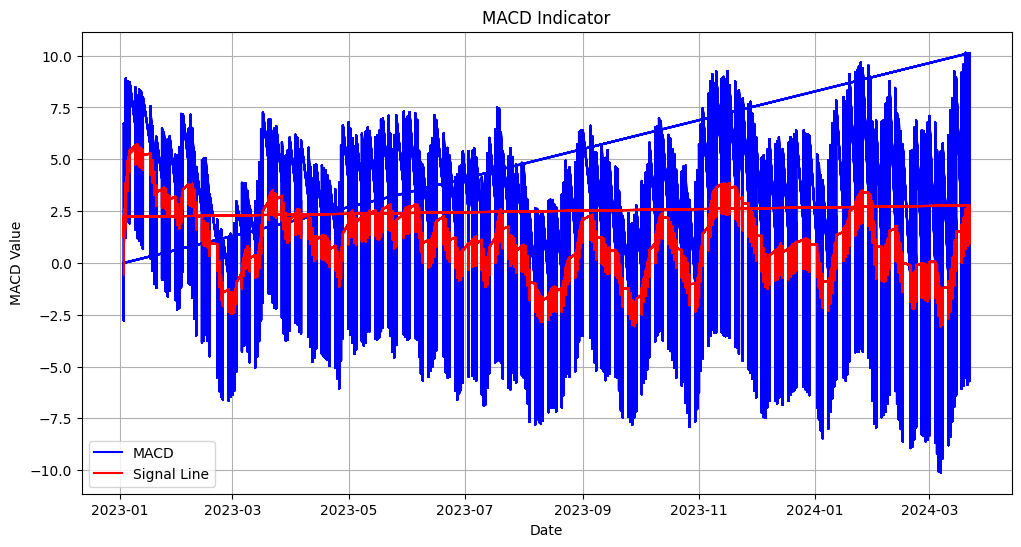

In [450]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot MACD Line
plt.plot(df_long.index, df_long['MACD'], label="MACD", color='blue')

# Plot Signal Line
plt.plot(df_long.index, df_long['MACD_Signal'], label="Signal Line", color='red')

# MACD Histogram (Bar Chart)

plt.xlabel("Date")
plt.ylabel("MACD Value")
plt.title("MACD Indicator")
plt.legend()
plt.grid()
plt.show()


In [451]:
df_long.reset_index(inplace=True)
df_long

,Date,index,Ticker,Price Type,Value,Price Difference,SMA,Rolling Std,Upper Band,Lower Band,EMA_12,EMA_26,Signal,MACD,MACD_Signal
0,2023-01-03,0,AAPL,Open,128.782641,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.000000
1,2023-01-03,1,GOOGL,Open,89.163703,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,-2.786963,-0.557393
2,2023-01-03,2,MSFT,Open,238.676634,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,6.751405,0.904367
3,2023-01-04,3,AAPL,Open,125.431607,-3.351034,NaN,NaN,NaN,NaN,NaN,NaN,0,5.346107,1.792715
4,2023-01-04,4,GOOGL,Open,89.920100,0.756397,NaN,NaN,NaN,NaN,NaN,NaN,0,1.212912,1.676754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5521,2024-03-21,5521,GOOGL,Open-Close Difference,1.861097,2.597581,NaN,NaN,NaN,NaN,NaN,NaN,0,-5.866746,0.834698
5522,2024-03-21,5522,MSFT,Open-Close Difference,0.456506,3.662044,NaN,NaN,NaN,NaN,NaN,NaN,0,10.123245,2.692407
5523,2024-03-22,5523,AAPL,Open-Close Difference,-0.517560,-6.170874,NaN,NaN,NaN,NaN,NaN,NaN,0,2.221978,2.598322
5524,2024-03-22,5524,GOOGL,Open-Close Difference,-1.642158,-3.503255,NaN,NaN,NaN,NaN,NaN,NaN,0,-5.702333,0.938191


In [452]:
import os
import pandas as pd
import numpy as np

file_path = r'D:\DAPortfolioData\StockData.csv'

# Reset index so 'Date' is a proper column
df_long_reset = df_long.reset_index()

# Ensure 'Date' is in datetime format
df_long_reset['Date'] = pd.to_datetime(df_long_reset['Date'], errors='coerce')

# Drop rows where 'Date' is NaT (invalid dates)
df_long_reset = df_long_reset.dropna(subset=['Date'])

# Replace infinities with NaN
df_long_reset.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert NaN to 0 (or use None for SQL NULL)
df_long_reset = df_long_reset.fillna(0)

# Ensure all numeric columns are float (avoiding type issues)
numeric_cols = df_long_reset.select_dtypes(include=['number']).columns
df_long_reset[numeric_cols] = df_long_reset[numeric_cols].astype(float)

# Round numbers to prevent SQL precision errors
df_long_reset[numeric_cols] = df_long_reset[numeric_cols].round(6)

# Save CSV
if os.path.exists(file_path):
    df_existing = pd.read_csv(file_path)

    if 'Date' in df_existing.columns:
        df_existing['Date'] = pd.to_datetime(df_existing['Date'], errors='coerce')
        max_date = df_existing['Date'].max()
    else:
        max_date = None  # No valid date column found

    if max_date:
        df_long_reset = df_long_reset[df_long_reset['Date'] > max_date]

    if not df_long_reset.empty:
        df_long_reset.to_csv(file_path, mode='a', header=False, index=False)
else:
    df_long_reset.to_csv(file_path, mode='w', header=True, index=False)


In [453]:
pip install fredapi


In [454]:
import pandas as pd
from fredapi import Fred

In [455]:
import requests
import zipfile
import io
import pandas as pd

# Your FRED API key
API_KEY = "679f0afcd8d40b6bf36577836cf3525b"

# Function to fetch data from FRED API and extract CSV
def fetch_fred_data(series_id, start_date="2023-01-01"):
    url = "https://api.stlouisfed.org/fred/series/observations"

    params = {
        "series_id": series_id,
        "api_key": API_KEY,
        "file_type": "csv",  # Request CSV (comes as a ZIP file)
        "observation_start": start_date
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        # Read the ZIP file from response
        zip_file = zipfile.ZipFile(io.BytesIO(response.content))
        # Extract and read the CSV file (FRED returns only one CSV file per request)
        csv_filename = zip_file.namelist()[1]  # Get the name of the CSV file
        df = pd.read_csv(zip_file.open(csv_filename))

        return df  # Return the DataFrame

    else:
        print(f"❌ Error fetching {series_id}: {response.status_code}")
        return None

# Test fetching GDP data
gdp_data = fetch_fred_data("GDP")
unemployment_data = fetch_fred_data("UNRATE")
inflation_data = fetch_fred_data("CPIAUCSL")



In [456]:
unemployment_data.head(50)

,period_start_date,UNRATE,realtime_start_date,realtime_end_date
0,2023-01-01,3.5,2025-04-04,NaN
1,2023-02-01,3.6,2025-04-04,NaN
2,2023-03-01,3.5,2025-04-04,NaN
3,2023-04-01,3.4,2025-04-04,NaN
4,2023-05-01,3.6,2025-04-04,NaN
5,2023-06-01,3.6,2025-04-04,NaN
6,2023-07-01,3.5,2025-04-04,NaN
7,2023-08-01,3.7,2025-04-04,NaN
8,2023-09-01,3.8,2025-04-04,NaN
9,2023-10-01,3.9,2025-04-04,NaN


In [457]:
print("📌 GDP Data Range:", gdp_data["period_start_date"].min(), "to", gdp_data["period_start_date"].max())
print("📌 Unemployment Data Range:", unemployment_data["period_start_date"].min(), "to", unemployment_data["period_start_date"].max())
print("📌 Inflation Data Range:", inflation_data["period_start_date"].min(), "to", inflation_data["period_start_date"].max())

📌 GDP Data Range: 2023-01-01 to 2024-10-01
📌 Unemployment Data Range: 2023-01-01 to 2025-02-01
📌 Inflation Data Range: 2023-01-01 to 2025-02-01


In [458]:
gdp_data["period_start_date"] = pd.to_datetime(gdp_data["period_start_date"])
unemployment_data["period_start_date"] = pd.to_datetime(unemployment_data["period_start_date"])
inflation_data["period_start_date"] = pd.to_datetime(inflation_data["period_start_date"])

In [459]:
print("\n🔍 GDP Data Frequency:")
print(gdp_data["period_start_date"].diff().value_counts().head())

print("\n🔍 Unemployment Rate Frequency:")
print(unemployment_data["period_start_date"].diff().value_counts().head())

print("\n🔍 Inflation Rate Frequency:")
print(inflation_data["period_start_date"].diff().value_counts().head())



🔍 GDP Data Frequency:
period_start_date
91 days    3
92 days    3
90 days    1
Name: count, dtype: int64

🔍 Unemployment Rate Frequency:
period_start_date
31 days    15
30 days     8
28 days     1
29 days     1
Name: count, dtype: int64

🔍 Inflation Rate Frequency:
period_start_date
31 days    15
30 days     8
28 days     1
29 days     1
Name: count, dtype: int64


In [460]:
gdp_data

,period_start_date,GDP,realtime_start_date,realtime_end_date
0,2023-01-01,27164.359,2025-04-04,NaN
1,2023-04-01,27453.815,2025-04-04,NaN
2,2023-07-01,27967.697,2025-04-04,NaN
3,2023-10-01,28296.967,2025-04-04,NaN
4,2024-01-01,28624.069,2025-04-04,NaN
5,2024-04-01,29016.714,2025-04-04,NaN
6,2024-07-01,29374.914,2025-04-04,NaN
7,2024-10-01,29723.864,2025-04-04,NaN


In [461]:
unemployment_data

,period_start_date,UNRATE,realtime_start_date,realtime_end_date
0,2023-01-01,3.5,2025-04-04,NaN
1,2023-02-01,3.6,2025-04-04,NaN
2,2023-03-01,3.5,2025-04-04,NaN
3,2023-04-01,3.4,2025-04-04,NaN
4,2023-05-01,3.6,2025-04-04,NaN
5,2023-06-01,3.6,2025-04-04,NaN
6,2023-07-01,3.5,2025-04-04,NaN
7,2023-08-01,3.7,2025-04-04,NaN
8,2023-09-01,3.8,2025-04-04,NaN
9,2023-10-01,3.9,2025-04-04,NaN


In [462]:
inflation_data

,period_start_date,CPIAUCSL,realtime_start_date,realtime_end_date
0,2023-01-01,300.456,2025-04-04,NaN
1,2023-02-01,301.476,2025-04-04,NaN
2,2023-03-01,301.643,2025-04-04,NaN
3,2023-04-01,302.858,2025-04-04,NaN
4,2023-05-01,303.316,2025-04-04,NaN
5,2023-06-01,304.099,2025-04-04,NaN
6,2023-07-01,304.615,2025-04-04,NaN
7,2023-08-01,306.138,2025-04-04,NaN
8,2023-09-01,307.374,2025-04-04,NaN
9,2023-10-01,307.653,2025-04-04,NaN


In [463]:
gdp_data.set_index("period_start_date", inplace=True)

gdp_monthly=gdp_data.resample("ME").ffill()

gdp_monthly.reset_index(inplace=True)

gdp_monthly.rename(columns={"period_start_date": "Date"}, inplace=True)

In [464]:
gdp_monthly

,Date,GDP,realtime_start_date,realtime_end_date
0,2023-01-31,27164.359,2025-04-04,NaN
1,2023-02-28,27164.359,2025-04-04,NaN
2,2023-03-31,27164.359,2025-04-04,NaN
3,2023-04-30,27453.815,2025-04-04,NaN
4,2023-05-31,27453.815,2025-04-04,NaN
5,2023-06-30,27453.815,2025-04-04,NaN
6,2023-07-31,27967.697,2025-04-04,NaN
7,2023-08-31,27967.697,2025-04-04,NaN
8,2023-09-30,27967.697,2025-04-04,NaN
9,2023-10-31,28296.967,2025-04-04,NaN


In [465]:
gdp_data=gdp_monthly

In [466]:
unemployment_data.rename(columns={'period_start_date':'Date', unemployment_data.columns[1]:'Unemployment Rate'}, inplace=True)
inflation_data.rename(columns={'period_start_date':'Date', inflation_data.columns[1]:'Inflation Rate'}, inplace=True)
gdp_data["Date"] = gdp_data["Date"].dt.to_period("M").dt.to_timestamp() #This is used to convert the date to the start of the month eg:from 2024-02-28 to 2024-02-01

In [467]:
intermediate=(pd.merge(inflation_data,unemployment_data, on='Date', how='left'))

In [468]:
result = pd.merge(intermediate, gdp_data, on ='Date', how='left')

In [469]:
result.set_index('Date',inplace=True)


In [470]:
result = result.infer_objects(copy=False)
df_resampled=result.resample('D').interpolate()

<ipython-input-470-ac3d091cc279>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_resampled=result.resample('D').interpolate()


In [471]:
df_resampled

,Inflation Rate,realtime_start_date_x,realtime_end_date_x,Unemployment Rate,realtime_start_date_y,realtime_end_date_y,GDP,realtime_start_date,realtime_end_date
Date,,,,,,,,,
2023-01-01,300.456000,2025-04-04,NaN,3.500000,2025-04-04,NaN,27164.359,2025-04-04,NaN
2023-01-02,300.488903,NaN,NaN,3.503226,NaN,NaN,27164.359,NaN,NaN
2023-01-03,300.521806,NaN,NaN,3.506452,NaN,NaN,27164.359,NaN,NaN
2023-01-04,300.554710,NaN,NaN,3.509677,NaN,NaN,27164.359,NaN,NaN
2023-01-05,300.587613,NaN,NaN,3.512903,NaN,NaN,27164.359,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-01-28,319.686097,NaN,NaN,4.087097,NaN,NaN,29723.864,NaN,NaN
2025-01-29,319.708323,NaN,NaN,4.090323,NaN,NaN,29723.864,NaN,NaN
2025-01-30,319.730548,NaN,NaN,4.093548,NaN,NaN,29723.864,NaN,NaN


In [472]:
df_resampled.dropna(axis=1, how='all', inplace=True)


In [473]:
df_resampled

,Inflation Rate,realtime_start_date_x,Unemployment Rate,realtime_start_date_y,GDP,realtime_start_date
Date,,,,,,
2023-01-01,300.456000,2025-04-04,3.500000,2025-04-04,27164.359,2025-04-04
2023-01-02,300.488903,NaN,3.503226,NaN,27164.359,NaN
2023-01-03,300.521806,NaN,3.506452,NaN,27164.359,NaN
2023-01-04,300.554710,NaN,3.509677,NaN,27164.359,NaN
2023-01-05,300.587613,NaN,3.512903,NaN,27164.359,NaN
...,...,...,...,...,...,...
2025-01-28,319.686097,NaN,4.087097,NaN,29723.864,NaN
2025-01-29,319.708323,NaN,4.090323,NaN,29723.864,NaN
2025-01-30,319.730548,NaN,4.093548,NaN,29723.864,NaN


In [474]:
df_resampled.drop(columns=['realtime_start_date_x','realtime_start_date_y'], inplace = True)

In [475]:
df_resampled['realtime_start_date']=df_resampled['realtime_start_date'].ffill()

In [476]:
df_resampled

,Inflation Rate,Unemployment Rate,GDP,realtime_start_date
Date,,,,
2023-01-01,300.456000,3.500000,27164.359,2025-04-04
2023-01-02,300.488903,3.503226,27164.359,2025-04-04
2023-01-03,300.521806,3.506452,27164.359,2025-04-04
2023-01-04,300.554710,3.509677,27164.359,2025-04-04
2023-01-05,300.587613,3.512903,27164.359,2025-04-04
...,...,...,...,...
2025-01-28,319.686097,4.087097,29723.864,2025-04-04
2025-01-29,319.708323,4.090323,29723.864,2025-04-04
2025-01-30,319.730548,4.093548,29723.864,2025-04-04


In [477]:
stock_data

,Date,Close,High,Low,Open,Volume,Ticker
0,2023-01-03,235.240036,241.298265,233.099519,238.676634,25740000,MSFT
1,2023-01-04,224.949875,228.651571,221.866756,228.072262,50623400,MSFT
2,2023-01-05,218.282867,223.427951,217.742828,223.084285,39585600,MSFT
3,2023-01-06,220.855408,221.670374,215.376502,218.960377,43613600,MSFT
4,2023-01-09,223.005722,227.051099,222.308592,222.347861,27369800,MSFT
...,...,...,...,...,...,...,...
302,2024-03-18,414.158051,417.542217,410.644864,411.111304,20106000,MSFT
303,2024-03-19,418.217102,418.475142,412.401486,414.664210,19837900,MSFT
304,2024-03-20,422.008118,422.732567,417.472736,418.802580,17860100,MSFT
305,2024-03-21,426.116760,427.555786,423.923513,426.573266,21296200,MSFT


In [478]:
# complete_stock=pd.read_csv(r'/content/D:\DAPortfolioData\StockData.csv')

In [479]:
# complete_stock

In [480]:
complete_data = pd.merge(df_long, df_resampled, on='Date', how='left')

In [481]:
complete_data.head()

,Date,index,Ticker,Price Type,Value,Price Difference,SMA,Rolling Std,Upper Band,Lower Band,EMA_12,EMA_26,Signal,MACD,MACD_Signal,Inflation Rate,Unemployment Rate,GDP,realtime_start_date
0,2023-01-03,0,AAPL,Open,128.782641,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.000000,300.521806,3.506452,27164.359,2025-04-04
1,2023-01-03,1,GOOGL,Open,89.163703,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,-2.786963,-0.557393,300.521806,3.506452,27164.359,2025-04-04
2,2023-01-03,2,MSFT,Open,238.676634,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,6.751405,0.904367,300.521806,3.506452,27164.359,2025-04-04
3,2023-01-04,3,AAPL,Open,125.431607,-3.351034,NaN,NaN,NaN,NaN,NaN,NaN,0,5.346107,1.792715,300.554710,3.509677,27164.359,2025-04-04
4,2023-01-04,4,GOOGL,Open,89.920100,0.756397,NaN,NaN,NaN,NaN,NaN,NaN,0,1.212912,1.676754,300.554710,3.509677,27164.359,2025-04-04


In [482]:
complete_data.shape

(5526, 19)

In [483]:
complete_data.set_index('Date', inplace=True)

In [484]:
complete_data

,index,Ticker,Price Type,Value,Price Difference,SMA,Rolling Std,Upper Band,Lower Band,EMA_12,EMA_26,Signal,MACD,MACD_Signal,Inflation Rate,Unemployment Rate,GDP,realtime_start_date
Date,,,,,,,,,,,,,,,,,,
2023-01-03,0,AAPL,Open,128.782641,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.000000,300.521806,3.506452,27164.359000,2025-04-04
2023-01-03,1,GOOGL,Open,89.163703,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,-2.786963,-0.557393,300.521806,3.506452,27164.359000,2025-04-04
2023-01-03,2,MSFT,Open,238.676634,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,6.751405,0.904367,300.521806,3.506452,27164.359000,2025-04-04
2023-01-04,3,AAPL,Open,125.431607,-3.351034,NaN,NaN,NaN,NaN,NaN,NaN,0,5.346107,1.792715,300.554710,3.509677,27164.359000,2025-04-04
2023-01-04,4,GOOGL,Open,89.920100,0.756397,NaN,NaN,NaN,NaN,NaN,NaN,0,1.212912,1.676754,300.554710,3.509677,27164.359000,2025-04-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,5521,GOOGL,Open-Close Difference,1.861097,2.597581,NaN,NaN,NaN,NaN,NaN,NaN,0,-5.866746,0.834698,312.693452,3.900000,28877.388355,2025-04-04
2024-03-21,5522,MSFT,Open-Close Difference,0.456506,3.662044,NaN,NaN,NaN,NaN,NaN,NaN,0,10.123245,2.692407,312.693452,3.900000,28877.388355,2025-04-04
2024-03-22,5523,AAPL,Open-Close Difference,-0.517560,-6.170874,NaN,NaN,NaN,NaN,NaN,NaN,0,2.221978,2.598322,312.722774,3.900000,28890.054323,2025-04-04


In [485]:
print(complete_data.info())
print('******************************************')
print(complete_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5526 entries, 2023-01-03 to 2024-03-22
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                5526 non-null   int64  
 1   Ticker               5526 non-null   object 
 2   Price Type           5526 non-null   object 
 3   Value                5526 non-null   float64
 4   Price Difference     5526 non-null   float64
 5   SMA                  921 non-null    float64
 6   Rolling Std          921 non-null    float64
 7   Upper Band           921 non-null    float64
 8   Lower Band           921 non-null    float64
 9   EMA_12               921 non-null    float64
 10  EMA_26               921 non-null    float64
 11  Signal               5526 non-null   int64  
 12  MACD                 5526 non-null   float64
 13  MACD_Signal          5526 non-null   float64
 14  Inflation Rate       5526 non-null   float64
 15  Unemployment Rate   

In [486]:
print(complete_data.describe())


             index         Value  Price Difference         SMA  Rolling Std  \
count  5526.000000  5.526000e+03      5.526000e+03  921.000000   921.000000   
mean   2762.500000  6.621013e+06     -8.698649e+03  206.234104    88.318161   
std    1595.363125  1.693966e+07      5.917555e+06   28.018137    17.364957   
min       0.000000 -1.347554e+01     -8.449900e+07  142.644265    57.089433   
25%    1381.250000  1.215588e+02     -1.851289e+00  185.456632    77.249744   
50%    2762.500000  1.759359e+02      1.977375e-01  211.074517    85.453464   
75%    4143.750000  3.347354e+02      2.299011e+00  226.486875   101.109711   
max    5525.000000  1.543573e+08      8.772870e+07  251.968780   128.586447   

       Upper Band  Lower Band      EMA_12      EMA_26       Signal  \
count  921.000000  921.000000  921.000000  921.000000  5526.000000   
mean   382.870426   29.597782  206.584818  205.670046     0.041983   
std     61.783157   12.853305   29.059087   28.604555     0.405898   
min    2

In [487]:
print(complete_data[complete_data["Value"] < 0])
print('******************************************************')
print(complete_data[complete_data["Price Difference"].abs() > 10**7])

            index Ticker             Price Type     Value  Price Difference  \
Date                                                                          
2023-01-06   4614   AAPL  Open-Close Difference -3.568502         -5.654251   
2023-01-06   4615  GOOGL  Open-Close Difference -0.547378         -1.811340   
2023-01-06   4616   MSFT  Open-Close Difference -1.895031         -6.696448   
2023-01-09   4619   MSFT  Open-Close Difference -0.657861          1.237170   
2023-01-10   4620   AAPL  Open-Close Difference -0.464599         -0.780929   
...           ...    ...                    ...       ...               ...   
2024-03-20   5517   AAPL  Open-Close Difference -2.936133         -1.204305   
2024-03-20   5518  GOOGL  Open-Close Difference -0.736484         -1.861112   
2024-03-20   5519   MSFT  Open-Close Difference -3.205538          0.347355   
2024-03-22   5523   AAPL  Open-Close Difference -0.517560         -6.170874   
2024-03-22   5524  GOOGL  Open-Close Difference -1.6

In [488]:
print(complete_data[['Price Type', 'SMA', 'Rolling Std', 'MACD']].head(30))


           Price Type  SMA  Rolling Std      MACD
Date                                             
2023-01-03       Open  NaN          NaN  0.000000
2023-01-03       Open  NaN          NaN -2.786963
2023-01-03       Open  NaN          NaN  6.751405
2023-01-04       Open  NaN          NaN  5.346107
2023-01-04       Open  NaN          NaN  1.212912
2023-01-04       Open  NaN          NaN  8.912657
2023-01-05       Open  NaN          NaN  6.757414
2023-01-05       Open  NaN          NaN  1.976979
2023-01-05       Open  NaN          NaN  8.778339
2023-01-06       Open  NaN          NaN  6.815337
2023-01-06       Open  NaN          NaN  1.912633
2023-01-06       Open  NaN          NaN  8.733640
2023-01-09       Open  NaN          NaN  6.623117
2023-01-09       Open  NaN          NaN  1.619217
2023-01-09       Open  NaN          NaN  8.481832
2023-01-10       Open  NaN          NaN  6.280979
2023-01-10       Open  NaN          NaN  1.196228
2023-01-10       Open  NaN          NaN  8.104067


In [489]:
print(complete_data[['Inflation Rate', 'Unemployment Rate', 'GDP']].drop_duplicates().head(20))


            Inflation Rate  Unemployment Rate        GDP
Date                                                    
2023-01-03      300.521806           3.506452  27164.359
2023-01-04      300.554710           3.509677  27164.359
2023-01-05      300.587613           3.512903  27164.359
2023-01-06      300.620516           3.516129  27164.359
2023-01-09      300.719226           3.525806  27164.359
2023-01-10      300.752129           3.529032  27164.359
2023-01-11      300.785032           3.532258  27164.359
2023-01-12      300.817935           3.535484  27164.359
2023-01-13      300.850839           3.538710  27164.359
2023-01-17      300.982452           3.551613  27164.359
2023-01-18      301.015355           3.554839  27164.359
2023-01-19      301.048258           3.558065  27164.359
2023-01-20      301.081161           3.561290  27164.359
2023-01-23      301.179871           3.570968  27164.359
2023-01-24      301.212774           3.574194  27164.359
2023-01-25      301.245677     

In [490]:
print(complete_data.groupby(complete_data.index).size().value_counts())

18    307
Name: count, dtype: int64


In [491]:
duplicates = complete_data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [492]:
import os
import pandas as pd
import numpy as np

def data_to_csv(dataset: pd.DataFrame, file_path: str):
    """
    Cleans the dataset and saves/appends it to a CSV file at the given path.

    Parameters:
    - dataset (pd.DataFrame): The cleaned/enriched DataFrame to export.
    - file_path (str): Full path to the target CSV file (e.g., 'D:/DAPortfolioData/final_dataset.csv').
    """

    if dataset.empty:
        print("Dataset is empty. Nothing to export.")
        return

    # Reset index so 'Date' becomes a column if it's in the index
    df = dataset.reset_index() if 'Date' not in dataset.columns else dataset.copy()

    # Ensure 'Date' is datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Drop rows with invalid dates
    df = df.dropna(subset=['Date'])

    # Replace infinities and fill NaNs
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)

    # Ensure all numeric columns are float
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].astype(float).round(6)

    # Check if file exists to decide on appending or writing new
    if os.path.exists(file_path):
        existing_df = pd.read_csv(file_path)

        if 'Date' in existing_df.columns:
            existing_df['Date'] = pd.to_datetime(existing_df['Date'], errors='coerce')
            max_existing_date = existing_df['Date'].max()
            df = df[df['Date'] > max_existing_date]

        if df.empty:
            print("No new data to append. CSV is up to date.")
            return

        df.to_csv(file_path, mode='a', header=False, index=False)
        print(f"Appended {len(df)} new rows to existing file.")
    else:
        df.to_csv(file_path, mode='w', header=True, index=False)
        print(f"Created new CSV with {len(df)} rows.")



In [494]:
file_path = r'D:\DAPortfolioData\CompleteData.csv'
data_to_csv(complete_data, file_path)

Created new CSV with 5526 rows.
